# Figure 4

Run the steps below to generate the mockdata and plot of Figure 4.

**Lennart van Sluijs** // 2019 Jan 8 // Leiden Observatory // vansluijs@strw.leidenuniv.nl

In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import os
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from aux import tableau20

# Generate mockdata
First define some functions.

In [13]:
def translate_1d(y, x0 = 0.):
    """
    Description:
        Translate a function y(x) -> y(x-x0).
    Input:
        y - list of y-values y(x)
        x0 - offset in x-direction
    Ouput:
        yt - list of y-values y(x-x0)
    """
    
    # interpolate on translated grid
    x = np.arange(len(y))
    f = interpolate.interp1d(x-x0, y, kind = 'linear', bounds_error = False,
                             fill_value = 0.)
    
    # evaluate function on this grid
    yt = f(x)
    
    return yt

def shear(data, offset):
    """
    Description:
        Shear spectral time series data with a specified offset.
    Input:
        data - numpy array containing STS data
        offset - shearing offset to use
    Output:
        data_s - sheared data
    """

    # loop over all slices and shear per slice
    data_s = np.copy(data)
    for n in range(data.shape[1]):
        data_s[:,n] = translate_1d(data[:,n], x0 = offset[n])
        
    return data_s

def reverse_shearing(data_obs, offsets):
    """
    Description:
        Reverse shifting of previous alignment and shearing.
    Input:
        data_obs - 2D numpy array containing STS data
        offsets - offsets used for previous shearing
    Ouput:
        data_obs - observational data after reversal of the shearing
    """
    
    # loop over all slices and reverse shear per slice
    for m in range(data_obs.shape[1]):
        data_obs[:, m] = translate_1d(data_obs[:, m], x0 = -offsets[m])

    return data_obs

def gauss_func(x, a, y0, x0, sigma):
    """
    Description:
        Simple Gaussian function.
    Input:
        x - list of values for which to evaluate the function
        a - amplitude
        y0 - offset in y-direction
        x0 - offset in x-direction
        sigma - standard deviation
    Output:
        y - list of values of function y(x)
    """
    
    y = a*np.exp(-(x-x0)**2/(2*sigma**2)) + y0
    
    return y

Then generate the mockdata.

In [14]:
def create_mockdata(nx, ny, P):
    """
    Description:
        Generate a mockdatacube with sinusoidal stellar pulsations and
        a Gaussian planet signal.
    Input:
        nx - x-dimension
        ny - y-dimension
        P - period of stellar pulsations
    Output:
        sts_p - sts of the planet
        sts_sp - sts of stellar pulsations
        sts_c - sts of both combined
    """
    
    # allocate memory for simulated spectral time series
    sts = np.zeros((nx, ny))
    
    # add sinusoidal signal as stellar pulsations
    x = np.arange(nx)
    y = np.sin(np.arange(ny) * (2*np.pi/P))
    xv, yv = np.meshgrid(x, y)
    offsets = np.linspace(-nx/2., nx/2., nx) * 1.25
    sts_sp = reverse_shearing(yv, offsets)
    
    # add planet signal as gaussian function
    x = np.arange(nx)
    y = gauss_func(np.arange(ny), 0.75, 0, ny/2.+10, 3.5)
    xv, yv = np.meshgrid(x, y)
    sts_p = np.copy(yv)
    
    # combine both
    sts_c = sts_sp + sts_p

    return sts_p, sts_sp, sts_c, offsets

# generate mockdata of an exoplanet signal and stellar pulsations
sts_p, sts_sp, sts_c, offsets = create_mockdata(10, 100, 10)

# Create plot

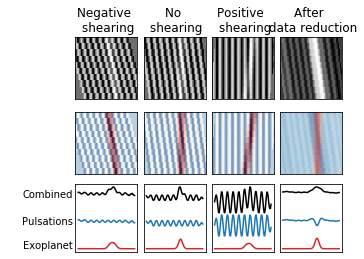

In [15]:
def create_figure(sts_p, sts_sp, sts_c, offsets, outputfolder):
    """
    Description:
        Create a figure to illustrate the stellar pulsation removal
        procedure.
    Input:
        sts_p - spectral time series containing planet signal
        sts_sp - spectral time series containing stellar pulsation signal
        sts_c - spectral time series containing combined signal
        offsets - shearing offsets that were used
        outputfolder - save the plot here
    """
    
    # create folder if it does not exist yet
    if not os.path.exists(outputfolder):
        os.makedirs(outputfolder)
    
    # create grid for figure
    fig, ax = plt.subplots()
    gs = gridspec.GridSpec(3, 5, wspace = 0.1, hspace = 0.1)
            
    ax1 = plt.subplot(gs[0:1, 1:2])
    ax2 = plt.subplot(gs[1:2, 1:2])
    ax3 = plt.subplot(gs[2:3, 1:2])

    ax4 = plt.subplot(gs[0:1, 2:3])
    ax5 = plt.subplot(gs[1:2, 2:3])
    ax6 = plt.subplot(gs[2:3, 2:3])
    
    ax7 = plt.subplot(gs[0:1, 3:4])
    ax8 = plt.subplot(gs[1:2, 3:4])
    ax9 = plt.subplot(gs[2:3, 3:4])
    
    ax10 = plt.subplot(gs[0:1, 4:5])
    ax11 = plt.subplot(gs[1:2, 4:5])
    ax12 = plt.subplot(gs[2:3, 4:5])
    
    ax13 = plt.subplot(gs[2:3, 0:1])
    
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    ax4.get_xaxis().set_visible(False)
    ax4.get_yaxis().set_visible(False)
    ax5.get_xaxis().set_visible(False)
    ax5.get_yaxis().set_visible(False)
    ax6.get_xaxis().set_visible(False)
    ax6.get_yaxis().set_visible(False)
    ax7.get_xaxis().set_visible(False)
    ax7.get_yaxis().set_visible(False)
    ax8.get_xaxis().set_visible(False)
    ax8.get_yaxis().set_visible(False)
    ax9.get_xaxis().set_visible(False)
    ax9.get_yaxis().set_visible(False)
    ax10.get_xaxis().set_visible(False)
    ax10.get_yaxis().set_visible(False)
    ax11.get_xaxis().set_visible(False)
    ax11.get_yaxis().set_visible(False)
    ax12.get_xaxis().set_visible(False)
    ax12.get_yaxis().set_visible(False)
    ax13.get_xaxis().set_visible(False)
    ax13.get_yaxis().set_visible(False)
    ax13.axis('off')

    # shear with same offset in negative and positive direction
    sts_p_neg = shear(sts_p, -offsets)
    sts_sp_neg = shear(sts_sp, -offsets)
    sts_c_neg = shear(sts_c, -offsets)
    sts_p_pos = shear(sts_p, offsets)
    sts_sp_pos = shear(sts_sp, offsets)
    sts_c_pos = shear(sts_c, offsets)
    
    # plot the spectral time series data and means along the time axes
    ax1.imshow(sts_c_neg.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Greys_r', alpha = 1)
    ax2.imshow(sts_p_neg.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Reds', alpha = 1)
    ax2.imshow(sts_sp_neg.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Blues', alpha = 0.5)
    ax3.plot(np.mean(sts_p_neg, axis = 1)-2, color = tableau20[6])
    ax3.plot(np.mean(sts_sp_neg, axis = 1), color = tableau20[0])
    ax3.plot(np.mean(sts_c_neg, axis = 1)+2, color = 'k')

    ax4.imshow(sts_c.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Greys_r', alpha = 1)
    ax5.imshow(sts_p.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Reds', alpha = 1)
    ax5.imshow(sts_sp.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Blues', alpha = 0.5)
    ax6.plot(np.mean(sts_p, axis = 1)-2, color = tableau20[6])
    ax6.plot(np.mean(sts_sp, axis = 1), color = tableau20[0])
    ax6.plot(np.mean(sts_c, axis = 1)+2, color = 'k')
    
    ax7.imshow(sts_c_pos.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Greys_r', alpha = 1)
    ax8.imshow(sts_p_pos.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Reds', alpha = 1)
    ax8.imshow(sts_sp_pos.T, extent = [0,1,0,1], aspect = 1,
               cmap = 'Blues', alpha = 0.5)
    ax9.plot(np.mean(sts_p_pos, axis = 1)-2, color = tableau20[6])
    ax9.plot(np.mean(sts_sp_pos, axis = 1), color = tableau20[0])
    ax9.plot(np.mean(sts_c_pos, axis = 1)+2, color = 'k')

    # peform data correction
    planet_est = np.mean(sts_c_neg, axis = 1)
    xx, sts_p_pos_est = np.meshgrid(np.arange(sts_c.shape[1]), planet_est)
    sts_sp_pos_est = sts_c_pos - sts_p_pos_est
    sts_corr_pos = sts_c_pos - sts_sp_pos_est
    sts_corr = reverse_shearing(sts_corr_pos, offsets)
    sts_sp_corr = reverse_shearing(sts_sp_pos - sts_sp_pos_est, offsets)
    sts_p_corr = reverse_shearing(sts_p_pos, offsets)

    # plot spectral time series after stellar pulsation correction
    ax10.imshow(sts_corr.T, extent = [0,1,0,1], aspect = 1,
                cmap = 'Greys_r', alpha = 1)
    ax11.imshow(sts_p_corr.T, extent = [0,1,0,1], aspect = 1,
                cmap = 'Reds', alpha = 1)
    ax11.imshow(sts_sp_corr.T, extent = [0,1,0,1], aspect = 1,
                cmap = 'Blues', alpha = 0.5)
    ax12.plot(np.mean(sts_p_corr, axis = 1)-2, color = tableau20[6])
    ax12.plot(np.mean(sts_sp_corr, axis = 1), color = tableau20[0])
    ax12.plot(np.mean(sts_corr, axis = 1)+2, color = 'k')
    
    # add titles and labels
    ax13.text(0.65, 0.85, s = 'Combined', ha = 'center', va = 'center')
    ax13.text(0.65, 0.45, s = 'Pulsations', ha = 'center', va = 'center')
    ax13.text(0.65, 0.1, s = 'Exoplanet', ha = 'center', va = 'center')
    ax1.set_title('Negative \n shearing', size = 12, ha = 'center')
    ax4.set_title('No \n shearing', size = 12, ha = 'center')
    ax7.set_title('Positive \n shearing', size = 12, ha = 'center')
    ax10.set_title('After \n data reduction', size = 12, ha = 'center')

    # ave figure    
    plt.savefig(os.path.join(outputfolder, 'figure4.pdf'))
    plt.savefig(os.path.join(outputfolder, 'figure4.png'), dpi = 300)
    plt.show()

# plot Figure 4
outputfolder = '../output/figure4/'
create_figure(sts_p, sts_sp, sts_c, offsets, outputfolder)